# Molecular Visualization with GGMolVis

This notebook provides some basic usage examples of the GGMolVis library.

Currently, they are proof of concept examples and are subject to change (and implement) in the future.

Please refer to the Installation guide for instructions on how to install the library.

In [1]:
import MDAnalysis as mda
from ggmolvis.tests.data import PSF, DCD
from MDAnalysis.analysis.rms import RMSD

import molecularnodes as mn
import numpy as np
import bpy

import ggmolvis
from ggmolvis.ggmolvis import GGMolVis

/Users/scottzhuang/mambaforge/envs/ggmolvis/lib/python3.11/site-packages
Read blend: "/Users/scottzhuang/git_rego/ggmolvis/examples/ggmolvis_3.blend"
Creating new GGMolVis


In [4]:
print(f'ggmolvis version: {ggmolvis.__version__}')
print(f'ggmolvis path: {ggmolvis.__file__}')
print(f'molecularnodes version: {mn.__file__}')

ggmolvis version: 0.0.0+32.g11e3891.dirty
ggmolvis path: /Users/scottzhuang/git_rego/ggmolvis/ggmolvis/__init__.py
molecularnodes version: /Users/scottzhuang/mambaforge/envs/ggmolvis/lib/python3.11/site-packages/molecularnodes/__init__.py


## Trajectory Visualization

Load the trajectory file by creating a MDAnalysis Universe object.
Replace `PSF` to your own topology file and `DCD` to your own trajectory file.

In [5]:
u = mda.Universe(PSF, DCD)

/Users/scottzhuang/mambaforge/envs/ggmolvis/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Initialize the GGMolVis object. It can be thought of as a `Figure` or a canvas for the molecular visualization.

In [6]:
ggmv = GGMolVis()

Select molecular entities of interest to be visualized. Refer to: https://docs.mdanalysis.org/stable/documentation_pages/selections.html for the selection syntax.

In [7]:
residues_ag = u.select_atoms('resid 127 40')
protein_ag = u.select_atoms('protein')

Here we include our molecules into the `GGMolVis` object by calling the `molecule` method.

In [8]:
residue_mol = ggmv.molecule(residues_ag)
protein_mol = ggmv.molecule(protein_ag, style='cartoon')
protein_surface_mol = ggmv.molecule(protein_ag, style='surface', material='transparent')

Render the current frame by calling the `render` method.

In [ ]:
residue_mol.render()

Render the selected frame by calling the `render(frame)` method.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpe5t3efjj.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpe5t3efjj.PNG'
Time: 00:04.00 (Saving: 00:00.01)



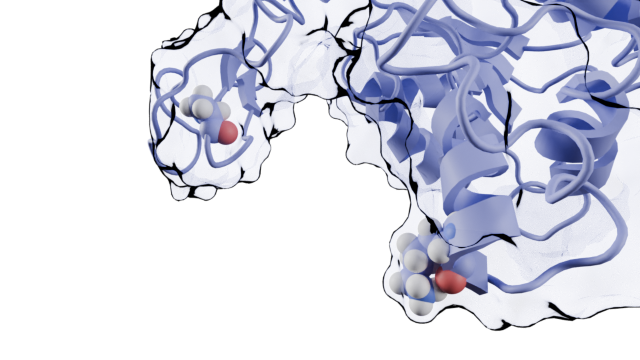

In [11]:
residue_mol.render(frame=60)

You can render the whole trajectory by calling the `.render(mode='movie')` method.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpdt6p703c.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpdt6p703c.PNG'
Time: 00:04.01 (Saving: 00:00.01)



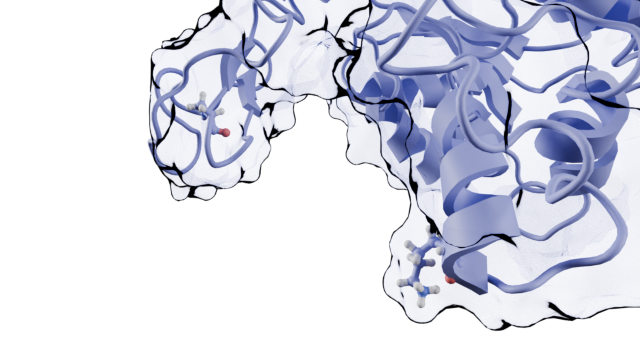

In [ ]:
residue_mol.render(mode='movie')

You can change the representation style by calling `set_style` method.

In [12]:
residue_mol.set_style('ball_and_stick')

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpdt6p703c.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpdt6p703c.PNG'
Time: 00:04.01 (Saving: 00:00.01)



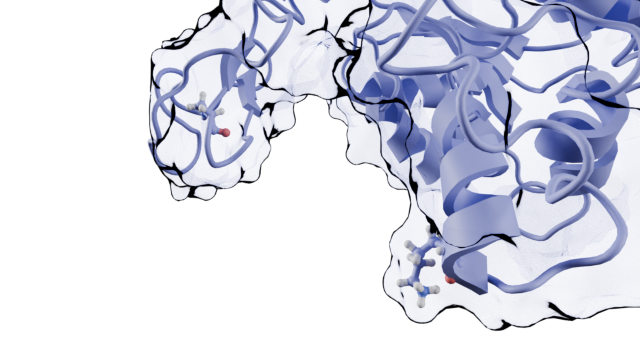

In [13]:
residue_mol.render()

Each molecule has a unique camera view pointing to the center of the molecule. There is also a global camera view. You can render different camera views by calling `render` with different molecules.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp4iphu0ds.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp4iphu0ds.PNG'
Time: 00:01.84 (Saving: 00:00.01)



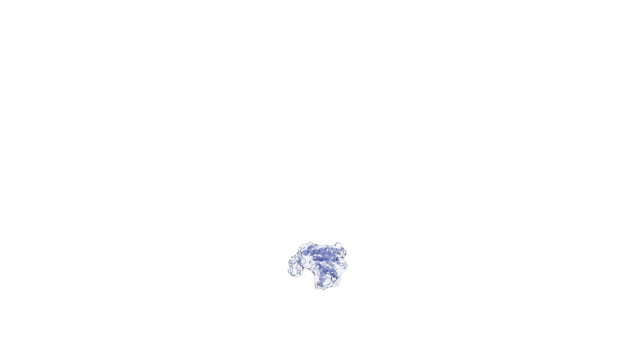

In [14]:
ggmv.global_camera.render()

Alternatively, GGMolVis also provides a `visualize` method to `AtomGroup`.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpwk_toxj1.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpwk_toxj1.PNG'
Time: 00:03.34 (Saving: 00:00.02)



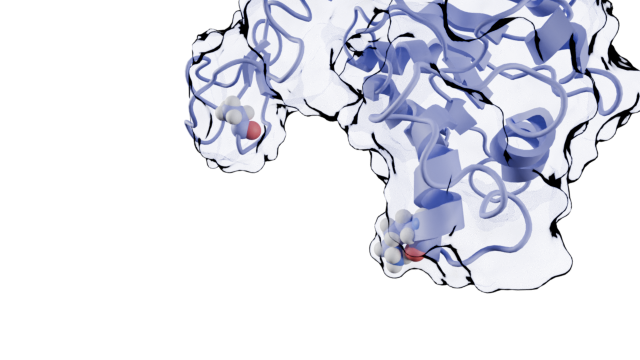

In [15]:
residues_ag.visualize()

## Geometric feature Visualization

Visualize simple geometric features, e.g. distance can be done by calling the `distance` method.

In [16]:
res_1 = residues_ag.residues[0].atoms
res_2 = residues_ag.residues[1].atoms
line = ggmv.distance(res_1, res_2, location=(5,0,0))

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpor3nc2eq.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpor3nc2eq.PNG'
Time: 00:02.11 (Saving: 00:00.01)



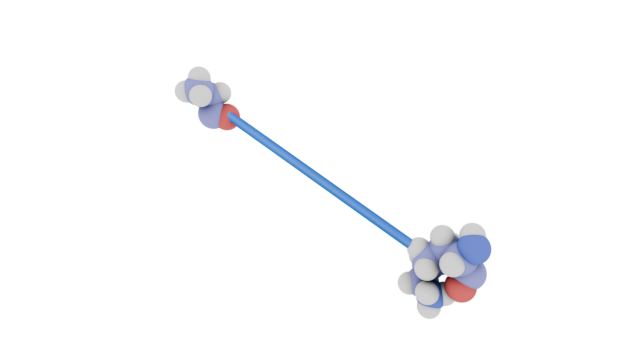

In [17]:
line.render()

## Analysis Visualization

In [18]:
rmsd = RMSD(u.select_atoms('name CA'))
rmsd.run()

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpw8_mwxcr.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpw8_mwxcr.PNG'
Time: 00:02.33 (Saving: 00:00.01)



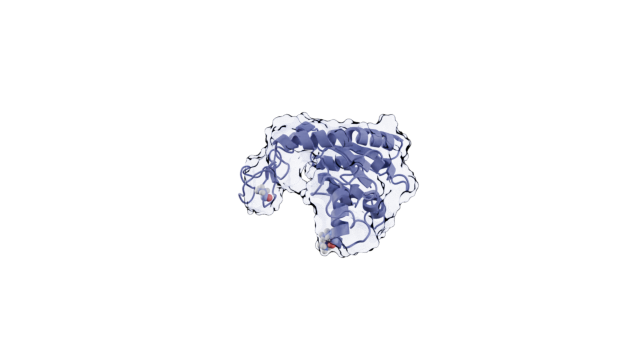

In [19]:
vis = rmsd.visualize()

In [ ]:
vis.render(mode='movie')

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmplda9vmc2.mp4
Append frame 1
Time: 00:02.26 (Saving: 00:00.00)

Append frame 2
Time: 00:02.11 (Saving: 00:00.00)

Append frame 3
Time: 00:02.08 (Saving: 00:00.00)

Append frame 4
Time: 00:02.06 (Saving: 00:00.00)

Append frame 5
Time: 00:02.04 (Saving: 00:00.00)

Append frame 6
Time: 00:02.02 (Saving: 00:00.00)

Append frame 7
Time: 00:02.04 (Saving: 00:00.00)

Append frame 8
Time: 00:02.17 (Saving: 00:00.00)

Append frame 9
Time: 00:02.05 (Saving: 00:00.00)

Append frame 10
Time: 00:02.08 (Saving: 00:00.00)

Append frame 11
Time: 00:02.07 (Saving: 00:00.00)

Append frame 12
Time: 00:02.01 (Saving: 00:00.00)

Append frame 13
Time: 00:02.00 (Saving: 00:00.00)

Append frame 14
Time: 00:02.06 (Saving: 00:00.00)

Append frame 15
Time: 00:02.05 (Saving: 00:00.00)

Append frame 16
Time: 00:02.01 (Saving: 00:00.00)

Append frame 17
Time: 00:02.02 (Saving: 00:00.00)

Append frame 18
Time: 00:02.08 (Saving: 00:00.00)

Append frame

: 